# Решающее дерево (Decision tree) Машинное обучение

In [1]:
#Решающее дерево, это один из методов машинного обучения
#Библиотека scikit-learn, которая позволяет реализовывать модели машинного обучения, не только решающие деревья

In [2]:
#Решающие деревья - метод машинного обучения, который неплохо показывает себя при решениях задач связанных с классификацией
#и регрессией
#Процесс классификации представляется в виде набора логических правил(True, False), из которых система строит логическое дерево
#Непонятно, как логическое дерево определяет логические правила

In [3]:
#В случае определения являются ли письма спамом или нет, исходные данные представляют собой текст. Его так просто не запихнёшь 
#в большинство моделей и для представления датасэта как множества точек нужны предварительные преобразования. Как вариант  
#посчитать число букв и число восклицательных знаков в каждом письме и уже на основании этих данных произвести визуализацию

In [4]:
#Зачем нужны решающие деревья?
#У регрессионной модели есть много ограничений, и в ситуациях, когда мы решаем задачи, где нет линейной зависимости
#линейные регрессии показывают себя плохо, поэтому мы используем другие методы, которые свободны от ограничений,
#Например решающие деревья

In [8]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Работа решающего дерева на простом примере

In [6]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [7]:
#Наша задача научиться предсказывать значение переменной y на основе переменных x_1 и x_2

In [8]:
#Создаем дерево
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
X = data[['X_1', 'X_2']] #данные, которые мы используем для обучения представляются ввиде массива/датафрейма/numpy array
y = data.Y #а предсказываемая переменная ввиде вектора

In [10]:
clf.fit(X, y) #обучаем дерево решений 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
#Визуализируем дерево, чтобы понять как оно работает

In [12]:
#import sys 
#!conda install -c anaconda graphviz python-graphviz
#установка graphviz

In [13]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [14]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;heigth:70% !important;}<style>"
HTML(style)

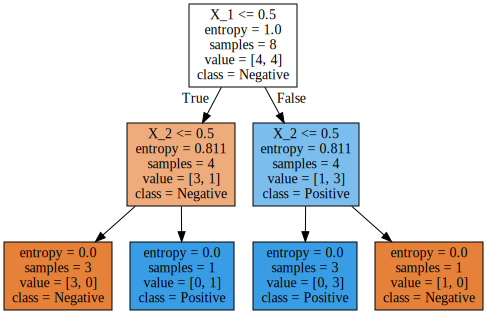

In [15]:
#визуализация дерева решений
graph = Source(tree.export_graphviz(clf, out_file=None, 
                                   feature_names=list(X),
                                   class_names=['Negative', 'Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [16]:
#Как дерево выбирает где делать split
#Задача угадать предсказываему переменную, задав наименьшее число вопросов
#Нужно задавать такие вопросы, которые отсекут часть наблюдений
#Наше дерево задает вопрос X<=0.5, который максимально снижает степень неопределенности (энтропию)

# Entropy reduction и Information gain

In [17]:
#Математическая идея решающего дерева
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [18]:
#Когда мы угадываем без каких-либо уточнений, какое-то значение, то мы находимся в зоне максимальной неопределенности
#Задавая дополнительные вопросы мы снижаем степень неопределенности
#1)В наших данных у нас есть изначально переменные y - 11110000, и полная неопределенность
#2)Формула энтропии E = summ(-pi*log2(pi)), в нашем случае энтропия в начале = 1(это максимальная степень неопределенности)
#если бы у нас все y были одинаковые, тогда вероятность одного исхода будет равна 0,а второго 1, тогда E=0*log2(0)+1*log2(1)=0 
#Чем больше преобладает один из классов, тем ближе энтропия к нулю
#3)так как X_2 у нас распределена как 00010001 и y 11110000, то при вопросе X_2>1/2 у нас энтропия не уменьшится
#Ey(X_2) = -1/2*log2(1/2) - 1/2*log2(1/2) = 1/2+1/2 = 1
#в то время, как Х_1 распределена как 11100001 -Задаем вопрос X_1 >1/2 => Eу(X_1 >1/2) = -1/4*log2(1/4)-3/4*log2(3/4) = 0.81
#Энтропия уменьшается
#4)IG = E0-E(y|x),где IG - снижение энтропии(information gain), E(y|x) = n2/N*Ey1 + n1/N*Ey2
#IG(x_2) = 1-(6/8*1+2/8*1) = 0
#IG(x_1) = 1-(4/8*0.81+4/8*0.81) = 0.19
#5)Теперь разбиваем по X_2>1/2 совместно с X_1>1/2
#X_1>1/2 -> (False) y =1000             X_1>1/2 -> (True) -> y =1110
#X_2>1/2 -> (False) -> y= 000 (True) -> y= 1        X_2>1/2 -> (False)-> y = 111 (True) -> y =0 
#Основная идея: у нас есть фичи и переменная y(которую мы предсказываем)
#Дерево решений ищет ищет переменную, по которой можно сделать split с максимальным IG(понижение энтропии)
#Этот алгоритм повтрояется до тех пор пока энтропия не станет равной 0, после чего алгоритм завершается

In [40]:
dogs = pd.read_csv('dogs.csv', index_col=0)
dogs

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


In [30]:
X = dogs[['Unnamed: 0', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = dogs['Вид']

In [32]:
clf.fit(X, y) #обучаем дерево решений 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
cats = pd.read_csv('cats.csv', index_col=0)
cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [57]:
#Расчет энтропий
import numpy as np
E_sherstist_0 = 0
E_sherstist_1 = -0.44*np.log2(0.44)-0.55*np.log2(0.55)
E_gavkaet_0 = 0
E_gavkaet_1 = -4/5*np.log2(4/5)-1/5*np.log2(1/5)
E_lazet_0 = 0
E_lazet_1 = 0
E_0 = -0.4*np.log2(0.4)-0.6*np.log2(0.6)

In [58]:
print(E_sherstist_0,
E_sherstist_1,
E_gavkaet_0,
E_gavkaet_1,
E_lazet_0,
E_lazet_1,
E_0)

0 0.995519873238004 0 0.7219280948873623 0 0 0.9709505944546686


In [59]:
IG_sherstist = 0.9709505944546686 -0.99*0.9
IG_gavkaet = 0.9709505944546686 - 0.72*0.5
IG_Lazaet = 0.9709505944546686 - 0

In [60]:
print(IG_sherstist,
IG_gavkaet,
IG_Lazaet)

0.07995059445466857 0.6109505944546686 0.9709505944546686


In [ ]:
#Если энтропия Y после сплита по какой-либо фиче не изменилась, то IG(фичи) = 0
#Если энтропия Y после сплита по какой-либо фиче стала равной 0, то IG(по фиче) - максимален

In [ ]:
#Материал для повторения алгоритма обучения дерева.
#https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8
#Наглядное введение в теорию машинного обучения
#http://www.r2d3.us/%D0%9D%D0%B0%D0%B3%D0%BB%D1%8F%D0%B4%D0%BD%D0%BE%D0%B5-%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B2-%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8E-%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE-%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F/

In [ ]:
#Основные понятия  по теме дерево решений
#Entropy and Information gain 
# Train / test split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# K-fold cross-validation - https://scikit-learn.org/stable/modules/cross_validation.html
#Hyper parameters and Grid search  - https://scikit-learn.org/stable/modules/grid_search.html


In [ ]:
#1.Дерево решений - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. 
#В процессе построения дерева выбираются переменные разделение, по которым позволяет нам с большей точностью разделять 
#исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.
#2. Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. Могут использоваться 
#и другие критерии.
#3. По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, 
#классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может 
#приводить к переобучению в результате избыточной глубины дерева.
#4.Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели 
#на тестовой выборке. Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, 
#т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях 
#в конкретной выборке.
#5. Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина 
#дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.
#6.В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. При таком подходе данные в выборке 
#разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 
#5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [134]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
#style = "<style>svg{width:10% !important;height:10% !important;</style>"
#HTML(style)

In [3]:
# https://www.kaggle.com/c/titanic/notebooks тут можно глянуть примеры решений задачи предсказания

# 1. Загрузка и просмотр данных

In [108]:
titanic_data = pd.read_csv('train.csv')

In [109]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
titanic_data.shape

(891, 12)

In [111]:
#Наша задача обучить модель предсказывать выживет человек или нет, по имеющемуся датасету

In [112]:
titanic_data.isnull().sum() #проверка пропущенных значений

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Отбор, обработка фичей и переменной для предсказания

In [113]:
#Убираем ненужные фичи

In [114]:
X = titanic_data.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], axis = 1) #axis = 1 - колонки
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [115]:
y = titanic_data.Survived #переменная, которую мы предсказываем

In [116]:
#В scikit-learn дерефо может работать только с числовыми данными, поэтому необходимо перевести строки в числа
#Можно перевести факторы в числа двумя способами:
#1)Переод фактора в значения 0,1,2.. и тд.
#2)Перевод фактора в несколько переменных с 0 и 1 dummie variables

In [117]:
X = pd.get_dummies(X) #
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [118]:
#Так же дерево решений не умеет работать с Nan значениями

In [119]:
X = X.fillna({'Age': X.Age.median()}) #заполняем пропущенные значения возраста медианным возрастом
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

# 3. Строим дерево решений

In [120]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [121]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Оверфиттинг(переобучение модели)

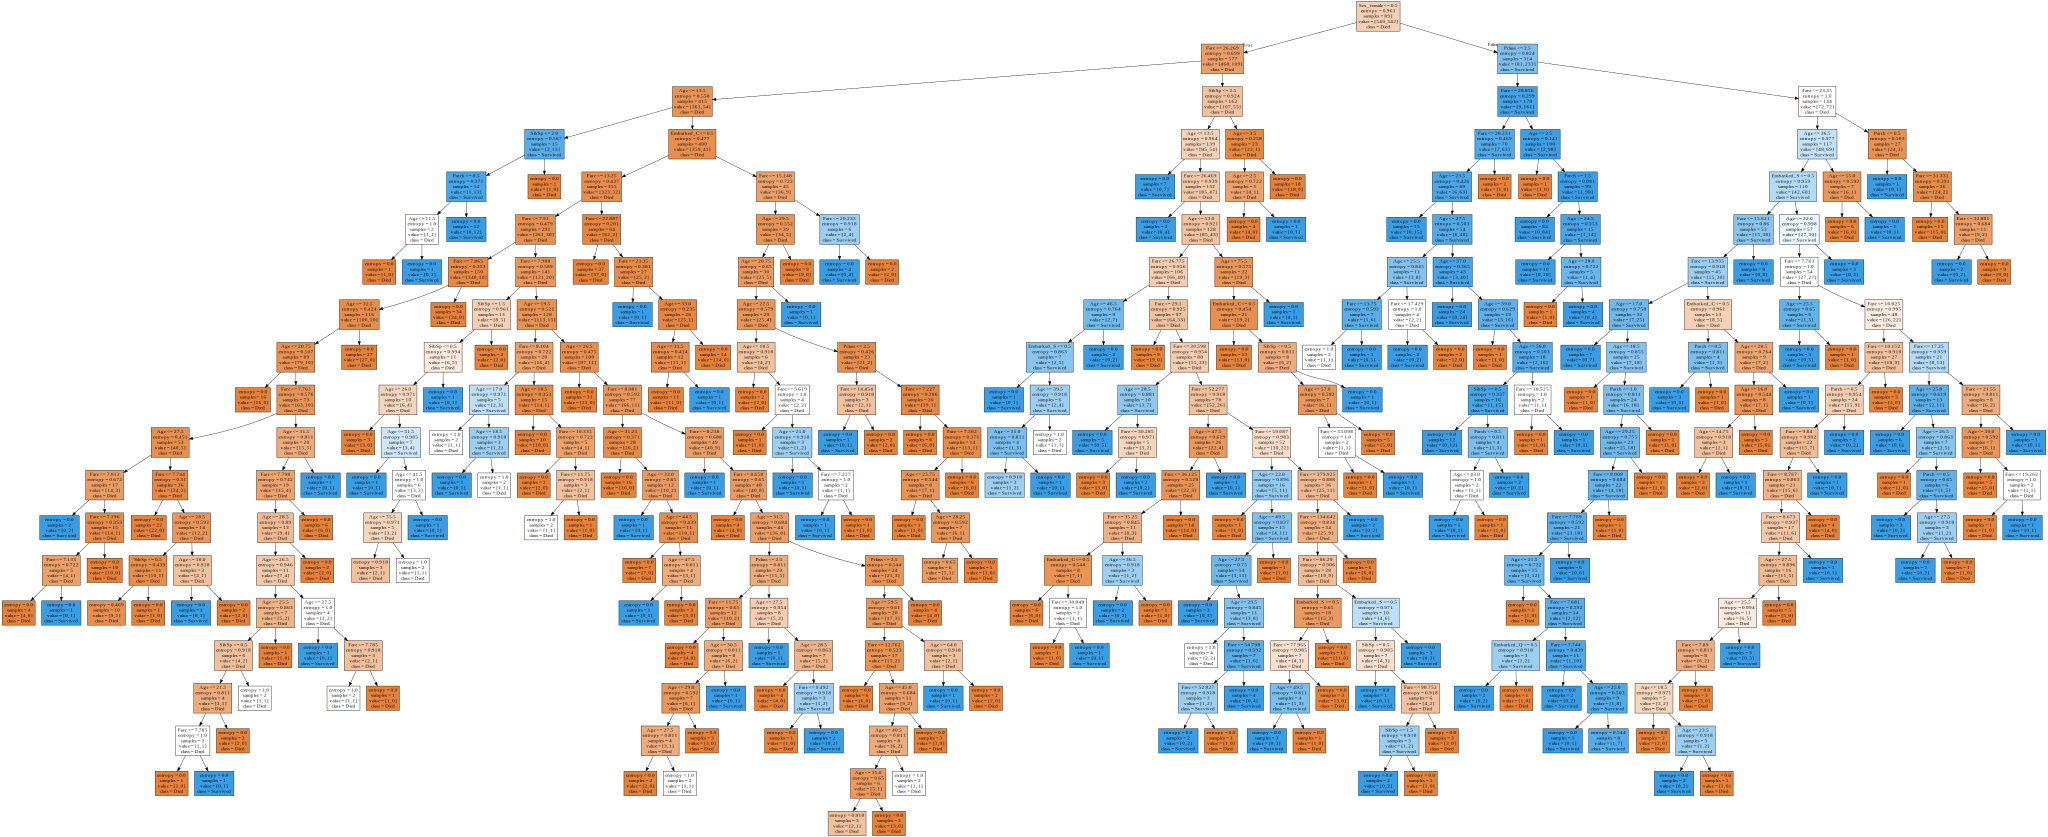

In [122]:
graph = Source(tree.export_graphviz(clf, out_file=None
                                    , feature_names=list(X), class_names=['Died', 'Survived']
                                    , filled=True))
display(SVG(graph.pipe(format='svg')))

In [123]:
#дерево просто классифицировало имеющиеся данные, но не вычленило никаких закономерностей, в данном случае перед деревом задача
#разобрать всех пассажиров на тех, кто умер и тех, кто выжил, только в данной конкретной выборке,а не предсказывать что-либо, 
#но нам надо научить модель именно предсказывать

# У нас есть две идеи:

In [124]:
#1)Научиться ограничивать дерево наше дерево в стремлении расти, как можно глубже
#2)Предоставлять нашему дереву данные для обучения, и данные для тестирования

In [125]:
#Основные задачи Регрессии, кластеринг и классификация

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #генерация трейн и тест множеств

In [24]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
clf.score(X, y) #проверяем наше дерево на исходных данных и получаем 98% успешных предсказаний

0.9797979797979798

In [26]:
clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
clf.score(X_train, y_train) #проверяем точность на трейне

0.9798657718120806

In [28]:
clf.score(X_test, y_test) #тестируем нашу модель на тестовых данных и получаем точность предсказаний 78% из-за переобучения

0.7796610169491526

# 4. Решение проблемы переобучения модели

In [29]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
clf.fit(X_train, y_train) 
clf.score(X_train, y_train) #получаем 84% точности на трейне, что хуже чем раньше

0.8238255033557047

In [31]:
clf.score(X_test, y_test) #но на тестовых данных лучше

0.8203389830508474

In [32]:
max_depth_values = range(1, 100)

In [33]:
scores_data = pd.DataFrame()

In [34]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                   'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data, sort=True)

In [35]:
scores_data

,max_depth,test_score,train_score
0,1,0.796610,0.781879
0,2,0.776271,0.805369
0,3,0.820339,0.823826
0,4,0.823729,0.833893
0,5,0.810169,0.840604
...,...,...,...
0,95,0.772881,0.979866
0,96,0.769492,0.979866
0,97,0.779661,0.979866
0,98,0.762712,0.979866


In [36]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score') #меняет датафрейм

In [37]:
scores_data_long.shape

(198, 3)

# Проблема переобучения еще не решена

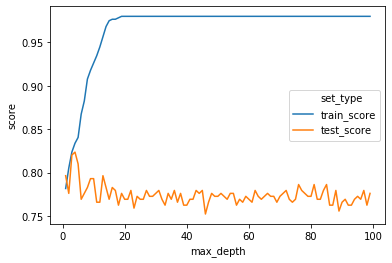

In [38]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long) 

In [39]:
#ВЫВОД: чем глубже мы даем нашему дереву расти, тем лучше дерево описывает наши данные, но тестовые данные эта модель 
#оценивает иначе, сначала модель недообучена, потом обучена, потом переобучена

In [40]:
#Чем сложнее закономерности в данных, тем более сложная нужна модель для их поиска
#Переобученная модель - модель, погрязшая в особенностях тренировочного датасэта, вместо вникания в общие закономерности
#Уменьшить переобученность поможет больший объём данных
#Упрощение модели препятствует переобучению

In [41]:
#Проблема еще в том, что мы даем нашей модели одни и те же тестовые данные
#Наш цикл крутился до тех пор, пока не подобрал верный ответ под тестовый датафрейм, по сути брутфорс
#Проблема переобучения еще не решена
#Решение проблемы переобучения модели - это валидация модели 
#До конца эта проблема решена быть не может, наша модель всегда позьмет что-то частное из данных, на которых она училась
#Один из способов этого избежать - это кросс-валидация
#Например можем разбить наши данные на train-множества, валидирующие множества, и в конце мы даём тестовые данные, 
#на которых модель еще ни разу не тестоировалась, и score на этих данных будет самым важным показателем

# Используем кросс-валидацию

In [42]:
#https://scikit-learn.org/stable/modules/cross_validation.html

In [43]:
#1)train_test_split Разделение имеющихся данных на тестовый и тренировочный наборы
#2)cross_validateРазделение данных на kk частей, тренировка на k - 1k−1 частях, тестирование на оставшейся; так для каждой части
#3)ShuffleSplitАналог обычного разделения на тестовый и тренировочный датасэты с большим числом таких случайных разделений
#4)LeaveOneOutРазделение данных на 2 части с n - 1n−1 и 11 наблюдением, на первой идёт тренировка, 2-ая - для предсказания; 
#каждое наблюдение побывает во второй части
#5)LeavePOutРазделение данных на 2 части с n - kn−k и kk наблюдениями, на первой идёт тренировка, 2-ая - для предсказания; 
#идёт ротация по всем наблюдениям
#6)StratifiedKFoldk-fold cross validation с учётом количества наблюдений в классах

In [44]:
#Основной проблемой нашего теста было то, что мы только один раз расфитили нашу модель и на ней пытались обучить нашу модель
#Самый простой способ валидации - это способ кросс-валидации

In [45]:
#Основная концепция Кросс-валидации:
#1)Сначала мы сплитим наши данные на два сета: Тренировочный и Тестовый 
#2)Тренировочные данные мы сплитим на n частей 
#3)Обучаем нашу модель на n-1 частей
#4)Тестируем нашу модель на n-ной части
#5)В итоге каждый элемент из сплита побывает и в обучении и в тесте
#6)Для каждого параметра дерева, мы будем проводить обучения, и усреднять точность на кросс-валидации

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [48]:
cross_val_score(clf, X_train, y_train, cv=5) #возвращает точности предсказания, обучившись сначала на первых 4-х кусках трейна
#предсказав 5ый, потом на 3х и 5м, предсказав 4ый, потом на 2х и 4-5, предсказав 3, потом на 1 и 3-5, предсказав 2, 
#потом на 2-5 и предсказав 1ый

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [49]:
cross_val_score(clf, X_train, y_train, cv=5).mean() #средняя точность

0.7835799743626264

# С учетом кросс-валидации

In [50]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [51]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.795261


In [52]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score') #меняет датафрейм

In [53]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


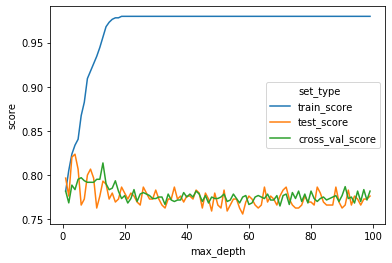

In [54]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long) #визуализация

In [55]:
scores_data_long.query("set_type == 'cross_val_score'").head(20) #смотрим значения cross_val_score

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.795261
203,6,cross_val_score,0.797069
204,7,cross_val_score,0.793636
205,8,cross_val_score,0.791857
206,9,cross_val_score,0.791871
207,10,cross_val_score,0.791828


In [56]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=14) #классификатор с наилучшими параметрами

In [57]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean() #средняя точность на best классификаторе

0.7932203389830509

# sklearn.model_selection.GridSearchCV

In [58]:
#На практике мы не будем писать эти скрипты руками, есть заготовленные обертки, например GridSearchCV
#GridSearchCV - это ключевая функция для обучения моделей, она позволяет взять некоторую модель, взять набор параметров, 
#которые мы хотим потюнить(например глубина дерева) и при помощи кросс-валидации отобрать такие параметры, которые
#будут оптимальные
#В качестве результата можно выбирать оптимизацию любой выходной метрики(например F-мера, accuracy и тд)

In [1]:
from sklearn.model_selection import GridSearchCV

In [4]:
clf = tree.DecisionTreeClassifier() 

In [5]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth':range(1, 30)}

In [6]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5) #передаем наш классификатор и словарь с параметрами, которые мы будем 
#проверять на кросс-валидации, а так же cv (количество разбиений в данных (foldов))

In [7]:
grid_search_cv_clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [64]:
#теперь обучаем нашу модель на некоторых данных
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [65]:
grid_search_cv_clf.best_params_ #наилучшие параметры

{'criterion': 'entropy', 'max_depth': 12}

In [66]:
best_clf_1 = grid_search_cv_clf.best_estimator_ #лучший классификатор из grid_search

In [67]:
best_clf_1 #глубина 5, критерий обучения - энтропия

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
best_clf_1.score(X_test, y_test) #точность 81%, но так как у нас дисбаланс классов(погибших и так гораздо больше чем выживших)
#мы не можем понять насколько наша модель действительно хорошо предсказывает исход события
#для того, чтобы оценить нашу модель мы рассчитаем точность, полноту, и ф-меру

0.7796610169491526

In [69]:
y_pred = best_clf_1.predict(X_test) #предсказание

In [70]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)  #например, если у нас мало спасательных лодок и не имеем права на ошибку этот показатель
#считается более важным чем реколл

0.7522935779816514

In [71]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred) #если у нас бесконечное число лодок, и мы можем ошибаться, то этот показатель может быть важнее 
#чем пресижн

0.6833333333333333

In [72]:
y_predicted_prob = best_clf_1.predict_proba(X_test) #вероятность выжить предсказанная нашим деревом для каждого пассажира

In [73]:
y_predicted_prob# тут хранятся вероятности

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.80952381, 0.19047619],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.93877551, 0.06122449],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.6       , 0.4       ],
       [0.80952381, 0.19047619],
       [0.93877551, 0.06122449],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [74]:
y_pred #тут хранятся предсказанные значения, которые отсекаются по умолчанию по вероятности 0.5, меньше то 0, больше - 1

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

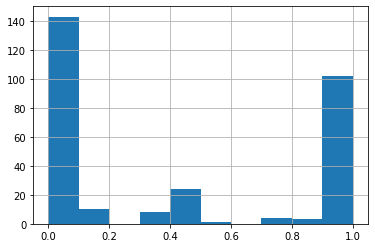

In [75]:
pd.Series(y_predicted_prob[:,1]).hist() #строим гистограмму вероятности, в данном случае мы отсекаем по отметке 0.5, но если
#мы хотим допустим максимизировать precision, то мы можем сделать отсечку больше 0.8

In [76]:
y_pred_1 = np.where(y_predicted_prob[:,1]>0.8, 1, 0) #перекодируем наш предиктед по отсечке 0.8(всё что выше - 1, ниже - 0)

In [77]:
precision_score(y_test, y_pred_1) #пересчитываем пресижн на новом предикте

0.7619047619047619

In [78]:
recall_score(y_test, y_pred_1) #пересчитываем рекол на новом предикте

0.6666666666666666

# ROC кривая

In [79]:
#Чтобы понять какую отсечку лучше выбрать,чтобы найти баланс между ошибками первого и второго рода можно использовать ROC-кривую
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html гайд

In [80]:
pd.Series(y_predicted_prob[:,1]).unique() #количество уникальных вероятностей (10 концов дерева - 10 возможных исходов)

array([1.        , 0.19047619, 0.        , 0.83333333, 0.4       ,
       0.06122449, 0.75      , 0.09677419, 0.33333333, 0.16666667,
       0.5       ])

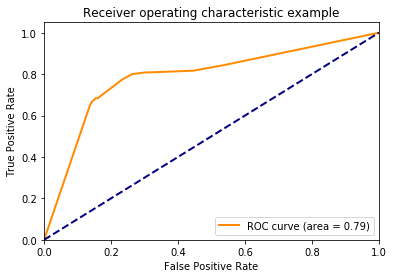

In [81]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import make_classification
%matplotlib inline

lw = 2
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [82]:
#ROC кривая, на оси y - True positive rate, на оси x - False positive rate
#В самом верху ROC Recall = 0.95 (всех выживших, мы классифицировали, как выживших, но при этом у нас много False posotove Rate)
#В самом низу ROC precision = 0.95, но при этом Тру позитив рейт рейт тоже снижается 
#Чем хуже работает наш классификатор, тем ближе ROC кривая к диагональной линии, и чем лучше - тем дальше соответственно
#ROC curve(area) = 0.85 это показатель насколько правильно наш классификатор отбирается классы?

# Меняем размер сэмпла для сплита

In [83]:
#Дерево решает задачу классификации
#Для тренировки дерева нам помогают концепции:
#1)Test и train множеств
#2)Валидационного множества
#3)Кроссвалидация
#4)Подбор оптимального параметра
#5)и тд

In [84]:
#Дерево решений - это сильно переобучаемый алгоритм
#Кроме глубины дерева, мы можем регулировать размер сэмпла при сплите

In [141]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [142]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [143]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1,0,0,0,1
270,1,28.0,0,0,31.0000,0,1,0,0,1
860,3,41.0,2,0,14.1083,0,1,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,0,1


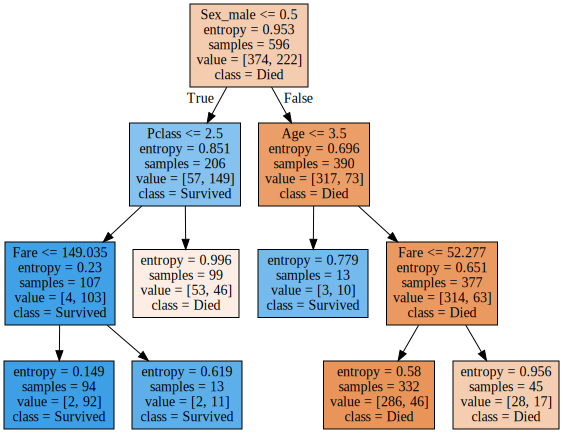

In [144]:
graph = Source(tree.export_graphviz(clf, out_file=None
                                    , feature_names=list(X), class_names=['Died', 'Survived']
                                    , filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
#балансировка между параметрами  max_depth, min_samples_split, min_samples_leaf может быть

In [ ]:
#чтобы найти оптимальную модель можно брать словарь с бОльшим шагом например для split с шагом 10 от 100 до 200

In [ ]:
#Есть две новости:
#1)При оптимальном подборе параметров, дерево может решать задачи связанные с классификацией
#Дерево решений напоминает то, как человек принимает решение
#2)Дерево решений - самый переобучаемый алгоритм, переобучение - это самая большая проблема машинного обучения
#Наша задача не дать дереву переобучиться
#Когда есть какие-то сложные данные, с количественными переменными, то дерево становится слишком сложным

In [ ]:
#Чем больше значение min_samples_split, тем меньше тенденция к переобучению
#Малая глубина дерева препятствует переобучению

In [ ]:
#Ни GridSearchCV, ни RandomizedSearchCV не гарантируют получение самой лучшей модели из возможных
#GridSearchCV находит наилучшее значение параметров модели из возникающих в результате комбинации переданных параметров
#RandomizedSearchCV работает быстрее GridSearchCV так как перебирает не все из возможных комбинаций параметров

# Iris Species test

## Создали трейн и тест фреймы

In [85]:
iris_train = pd.read_csv('train_iris.csv', index_col=0)
X_iris_train = iris_train[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_iris_train = iris_train.species
iris_test = pd.read_csv('test_iris.csv')
X_iris_test = iris_test[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_iris_test = iris_test.species

## максимальная глубина

In [86]:
max_depth_values = range(1, 100)

## создание датафрейма с результатами

In [87]:
scores_data = pd.DataFrame()

# цикл

In [88]:
np.random.seed(0)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_iris_train, y_iris_train)                              #Обучаем модель на трейне
    train_score = clf.score(X_iris_train, y_iris_train)              #Записываем результат на трейне
    
    accuracy_score = clf.score(X_iris_test, y_iris_test)              #записываем аккуратность предсказания
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'accuracy_score': [accuracy_score]})
    
    scores_data = scores_data.append(temp_score_data)

## создание общего датафрейма в длину

In [89]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'accuracy_score'],
                          var_name='set_type', value_name='score') #меняет датафрейм

In [90]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,accuracy_score,0.92
194,96,accuracy_score,0.92
195,97,accuracy_score,0.92
196,98,accuracy_score,0.94


## визуализация

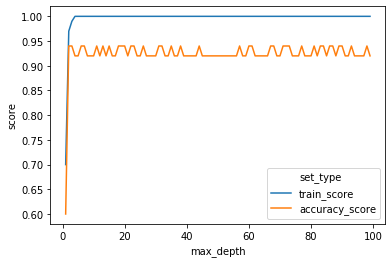

In [91]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [92]:
#Мы оптимизировали точность, но нам не обязательно надо оптимизировать точность, нам гадо изучить метрики оптимизации модели

# Dogs_n_cats

In [93]:
dogs_n_cats = pd.read_csv('dogs_n_cats.csv')
dogs_n_cats_test = pd.read_json('dataset_209691_15.txt')
X_test = dogs_n_cats_test
X=dogs_n_cats[['Длина', 'Высота','Шерстист','Гавкает','Лазает по деревьям']]
y=dogs_n_cats.Вид

In [94]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)                                   #создание модели

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
hh = clf.predict(X_test)
l = list(hh)
l.count('собачка') #предсказание

49

In [96]:
#https://habr.com/ru/post/202090/

# Задача predict

In [97]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #сразу импортируцется DecisionTreeClassifier
from sklearn.metrics import precision_score
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
precision = precision_score(y_test, predictions, average='micro')

NameError: name 'x_train' is not defined